### Problem 1

#### Soln1.1

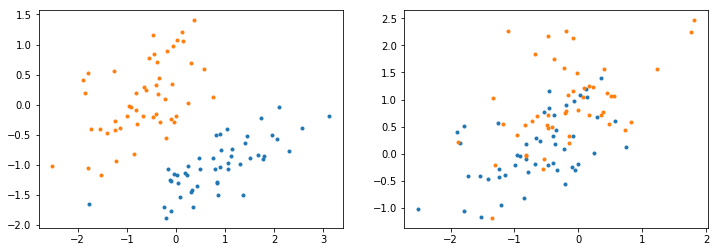

In [1]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
%matplotlib inline

iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y = ml.shuffleData(X,Y) # reorder randomly (important later)
X,_ = ml.rescale(X) # works much better on rescaled data

XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2

fig,axes = plt.subplots(1,2,figsize = (12,4))
for c in np.unique(YA):
    axes[0].plot(XA[YA==c,0],XA[YA==c,1],'.')
for c in np.unique(YB):
    axes[1].plot(XB[YB==c,0],XB[YB==c,1],'.')

The data set XA,YA is linearly separable whereas the data set XB,YB is not.

#### Soln1.2

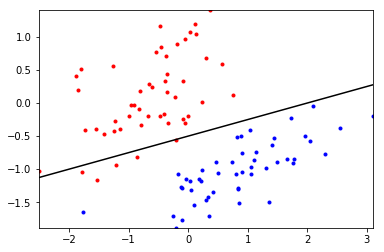

In [2]:
from logisticClassify2 import *
learner1 = logisticClassify2()

learner1.classes = np.unique(YA)
wts = np.array([.5,-.25,1]) # TODO: fill in values
learner1.theta = wts;


learner1.plotBoundary(XA,YA)

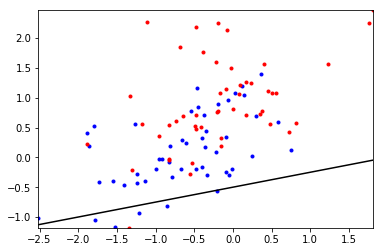

In [3]:
learner2 = logisticClassify2()
learner2.classes = np.unique(YB)
wts = np.array([.5,-.25,1]) # TODO: fill in values
learner2.theta = wts;


learner2.plotBoundary(XB,YB)

#### Soln 1.3

 def predict(self, X):
        """ Return the predictied class of each data point in X"""
        ## raise NotImplementedError
        ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] + ... for each i
        r = [None] * (X.shape[0])
        Yhat = [None] * (X.shape[0])
        for i in range(0,X.shape[0]):
            r[i] = self.theta[0] + self.theta[1] * X[i,0] + self.theta[2] * X[i,1]
        ## TODO: if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
            if(r[i] > 0):
                Yhat[i] = self.classes[1]
            else:
                Yhat[i] = self.classes[0]
        ##       else predict class 0:  Yhat[i] = self.classes[0]
        return np.array(Yhat)

In [4]:
XAerr = learner1.err(XA,YA)
XBerr = learner2.err(XB,YB)

print("Error rate for dataset A:" + str(XAerr))
print("Error rate for dataset B:" + str(XBerr))

Error rate for dataset A:0.050505050505050504
Error rate for dataset B:0.46464646464646464


#### Soln 1.4


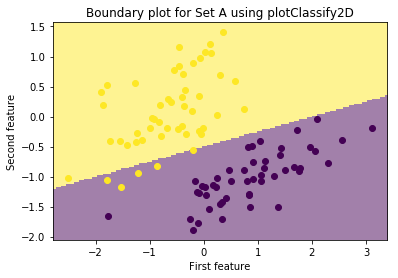

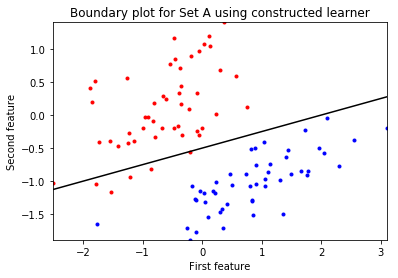

In [5]:
ml.plotClassify2D(learner1,XA,YA)
plt.title('Boundary plot for Set A using plotClassify2D')
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.show()

learner1.plotBoundary(XA,YA)
plt.title('Boundary plot for Set A using constructed learner')
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.show()

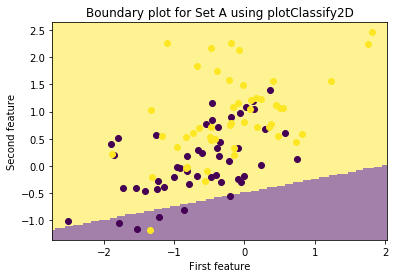

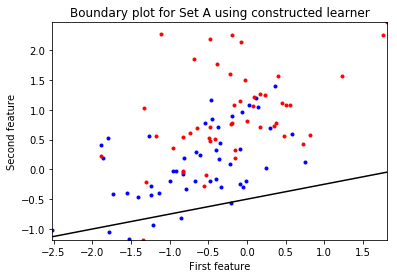

In [6]:
ml.plotClassify2D(learner2,XB,YB)
plt.title('Boundary plot for Set A using plotClassify2D')
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.show()

learner2.plotBoundary(XB,YB)
plt.title('Boundary plot for Set A using constructed learner')
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.show()

#### Soln 1.5

$$J_j(\theta) = -y^j\log\sigma(x^j\theta^T) - (1 - y^j)\log(1 - \sigma(x^j\theta^T))$$

Using the chain rule of differentiation

$$\frac{\partial}{\partial\theta_k} J_j(\theta) = -y^j \frac{\partial}{\partial\sigma(x^j\theta^T)} \log\sigma(x^j\theta^T) \frac{\partial\sigma(x^j\theta^T)}{\partial\theta_k}
 $$ 
 $$- (1 - y^j)\frac{\partial}{\partial(1 - \sigma(x^j\theta^T))} \log(1 -\sigma(x^j\theta^T))
 \frac{\partial(1 - \sigma(x^j\theta^T))}{\partial\theta_k}$$

using the fact that $\frac{\partial}{\partial x}\log x = \frac{1}{x}$ , we get

$$\frac{\partial}{\partial\theta_k} J_j(\theta) = -y^j\frac{1}{\sigma(x^j\theta^T)} 
\frac{\partial\sigma(x^j\theta^T)}{\partial(x^j\theta^T)} \frac{\partial(x^j\theta^T)}{\partial\theta_k}
$$ 
$$ - (1 - y^j)\frac{1}{(1 - \sigma(x^j\theta^T))} [-\frac{\partial\sigma(x^j\theta^T)}{\partial(x^j\theta^T)}]
\frac{\partial(x^j\theta^T)}{\partial\theta_k}$$

Substituting $\frac{\partial(x^j\theta^T)}{\partial\theta_k} = x^j_k and 
\frac{\partial(\sigma(s))}{\partial(s)} = \sigma(s)(1 - \sigma(s))$, we get


$$\frac{\partial}{\partial\theta_k} J_j(\theta) = -y^j \frac{1}{\sigma(x^j\theta^T)}
\sigma(x^j\theta^T)(1 - \sigma(x^j\theta^T)) x^j_k
$$
$$ -(1 - y^j)\frac{1}{(1 - \sigma(x^j\theta^T))}[-\sigma(x^j\theta^T)(1 - \sigma(x^j\theta^T))] x^j_k$$

Simplifying, we get

$$\frac{\partial}{\partial\theta_k} J_j(\theta) = [-y^j(1 - \sigma(x^j\theta^T))
-(1 - y^j)(-\sigma(x^j\theta^T))] x^j_k$$

Hence, $$\frac{\partial}{\partial\theta_k} J_j(\theta) = (\sigma(x^j\theta^T) - y^j)x^j_k$$

Substituting k = 0,1,2

$$\frac{\partial}{\partial\theta_0} J_j(\theta) = (\sigma(x^j\theta^T) - y^j)x^j_0$$ 
$$ where x^j_0 = 1 $$

$$\frac{\partial}{\partial\theta_1} J_j(\theta) = (\sigma(x^j\theta^T) - y^j)x^j_1$$

$$\frac{\partial}{\partial\theta_2} J_j(\theta) = (\sigma(x^j\theta^T) - y^j)x^j_2$$

#### Soln 1.6

 def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
        
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];
        
        def sigma(x):
            return 1 / (1 + math.exp(-x))
        
        while not done:
            Jsur = 0.0
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri    = self.theta[0] + self.theta[1] * XX[i,1] + self.theta[2] * XX[i,2]    # TODO: compute linear response 
                
                predY = sigma(ri)
                
                gradientTheta0 = (predY - YY[i]) * XX[i,0]
                gradientTheta1 = (predY - YY[i]) * XX[i,1]
                gradientTheta2 = (predY - YY[i]) * XX[i,2]
                
                gradi = np.array([gradientTheta0,gradientTheta1,gradientTheta2]);     # TODO: compute gradient of NLL loss
                self.theta -= stepsize * gradi;  # take a gradient step
                
                Jsur += (-YY[i] * np.log(predY) -(1 - YY[i]) * np.log(1 - predY))     # TODO: compute surrogate loss

            J01.append( self.err(X,Y) )  # evaluate the current error rate
            
            Jnll.append( Jsur / M ) # TODO evaluate the current NLL loss
            if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            
            plt.pause(.01);                    # let OS draw the plot

            ## For debugging: you may want to print current parameters & losses
            # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
            # raw_input()   # pause for keystroke

            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            # done = NotImplementedError;   # or if Jnll not changing between epochs ( < stopTol )
            if(epoch > stopEpochs or (epoch > 1 and abs(Jnll[-1] - Jnll[-2]) < stopTol)):
                done = True
        plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses   
        


#### Soln 1.7

For dataset A(which is linearly separable), we need to come up with a initStep size so that our surrogate loss function monotonically decreases, but also we need to minimize the number of epochs, so experimenting, i found that initStep size of 4 still ensures that the surr loss decreases monotonically. 
For dataset B(which is not linearly separable), we get initStep size to 0.2 to ensure that surr loss function monotonically decreases.

Dataset A

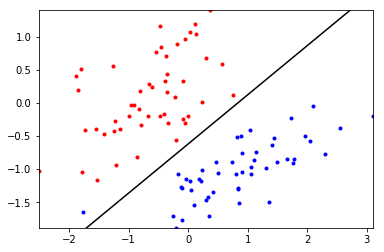

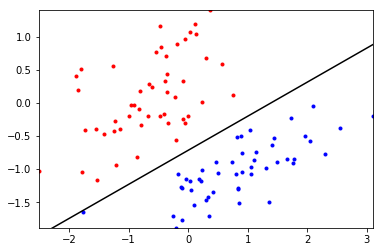

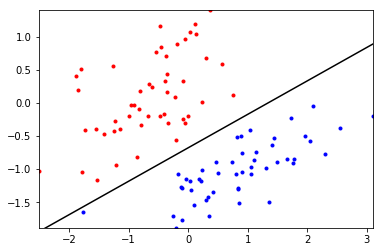

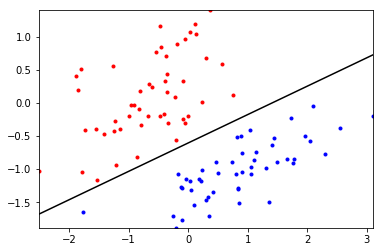

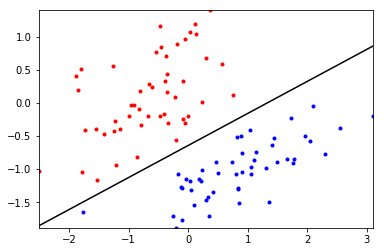

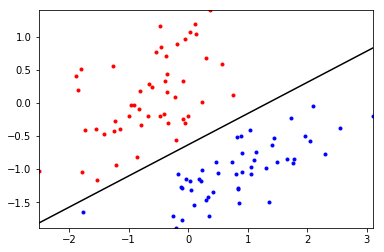

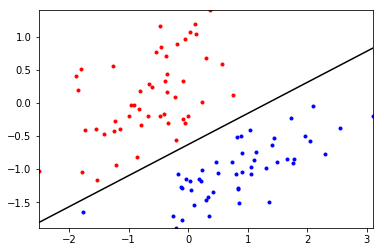

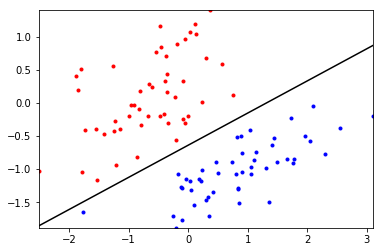

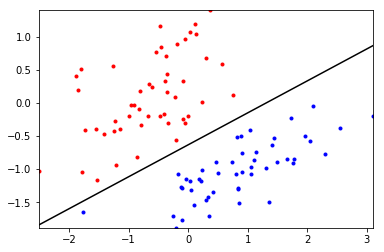

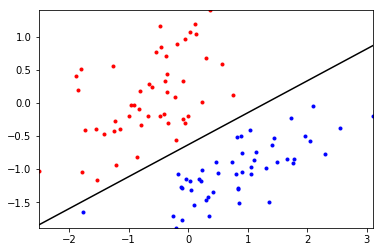

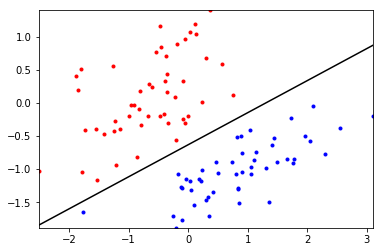

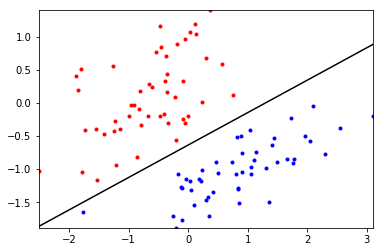

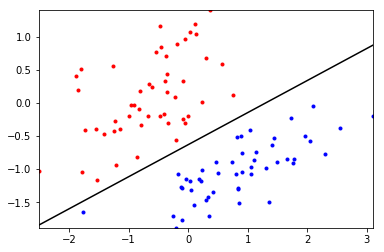

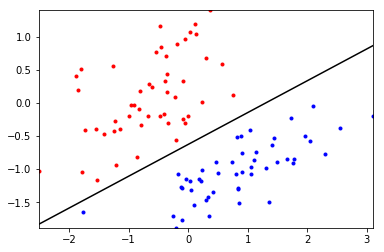

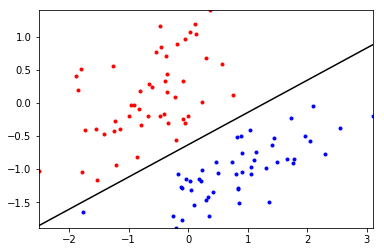

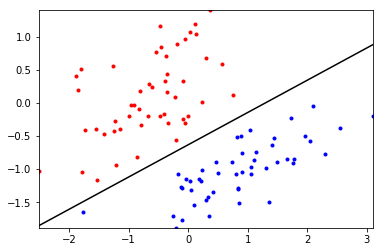

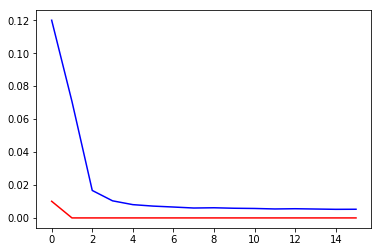

In [10]:
learnerA = logisticClassify2()

learnerA.classes = np.unique(YA)
wts = np.array([.5,-.25,1]) # TODO: fill in values
learnerA.theta = wts;

learnerA.train(XA, YA, 4)


Dataset B

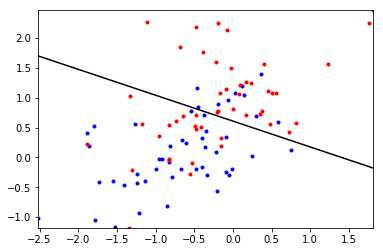

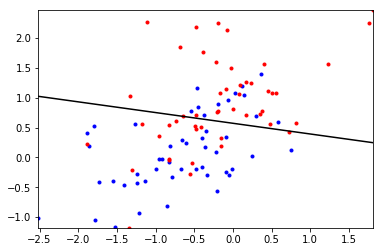

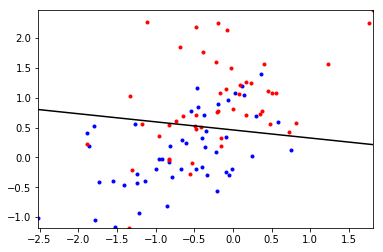

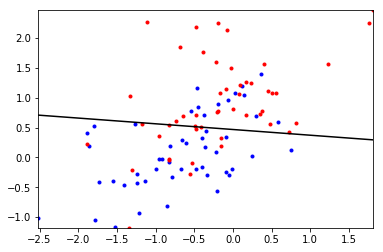

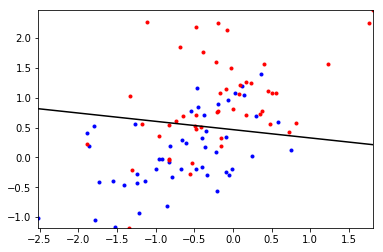

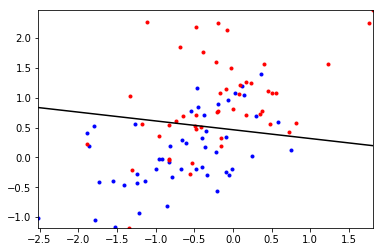

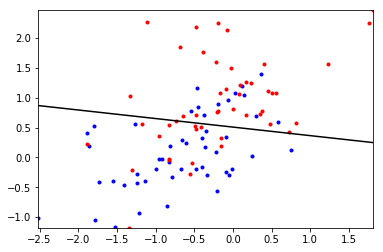

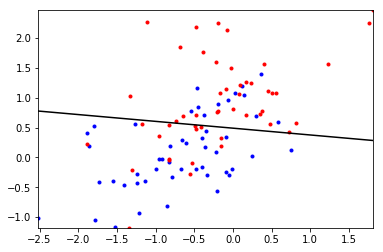

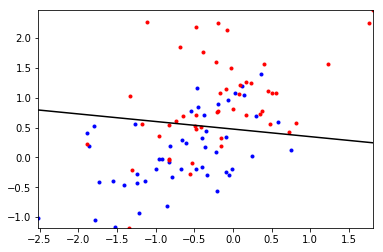

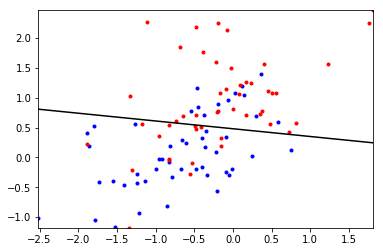

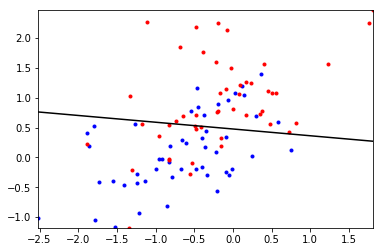

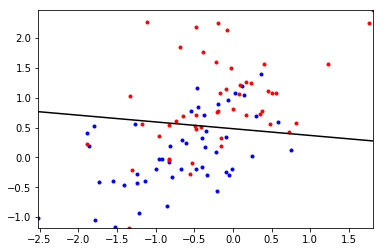

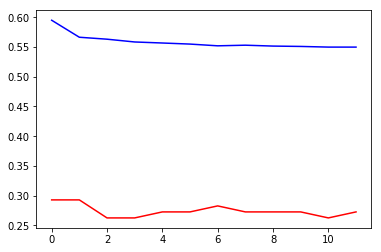

In [11]:
#%matplotlib nbagg
learnerB = logisticClassify2()

learnerB.classes = np.unique(YB)
wts = np.array([.5,-.25,1]) # TODO: fill in values
learnerB.theta = wts;

learnerB.train(XB, YB, 0.2)

### Problem 2


#### Soln 2.1

T( a + bx<sub>1</sub> ) just represents a vertical line with x<sub>1</sub> intercept =
\begin{equation*}
\frac{-a}{b}\
\end{equation*}
It can easily shatter (a).
It can easily shatter (b) as we can place the vertical any way to correctly get all combinations for this case.
However, in (c) if we choose a combination in which points at A(2,2) and C(6,4) belong to the same class(say negative) and the point at B(4,8) is in the opposite class(so, positive), then we cannot get this configuration with a vertical line(as A and C being in the same class would require that the x<sub>1</sub> intercept be less than 2 or greater than 6. But, that would mean that B would also would belong to the same class as A and C).
Hence, this learner can shatter (a) and (b) .VC Dimensionality = 2 

#### Soln 2.2

T( (a ∗ b)x<sub>1</sub> + (c/a)x<sub>2</sub> ) is a line passing through the origin. 
One point(a) can be easily shattered by this learner(trivial)
It can easily shatter (b) as shown below.
Say A(2,2) and B(4,8) are in the same class(both positive or negative). Then we can construct a line learner that starts at the origin(0,0) goes under both the points or over both the points, correctly classifying them in the same class.
Also if, the two points are in a different class, say A in (+) and B in(-), or vice-versa, then we can make the line pass through somewhere in the middle of A and B. 

However, it cannot shatter (c), for example, if A is (+) and B(-) and C(6,4)(-), then we cannot orient a line crossing through the origin to correctly classify the above combination of classes. 
Hence, this learner can only shatter (a) and (b). So, VC Dimensionality = 2


#### Soln 2.3

T( (x<sub>1</sub> − a)<sup>2</sup> + (x<sub>2</sub> − b)<sup>2</sup> + c ) represents a circle with variable center (a,b) and variable radius c. 
(a) can be easily shattered by this learner as we can place the point inside the circle(-) and outside the circle(+).
(b) can also be easily shattered as we can place the circle to keep both points out(both +), or we one point inside and one outside(one + and one -) and also both inside the circle(both -). As all combinations for this configuration of points can be classified correctly,(b) can also be shattered by this.
(c) can also be shattered, as we can place the circle to keep all 3 points out(all + class), one point inside and two outside(one - and two + class), two points inside and one outside(two - and one + class) and all points inside(all - class). As, all the combinations of classes for this configuration of points can be shattered by this learner, (c) can be shattered by this. 
However,(d) cannot be shattered by this as if we assign the points A(2,2) as a (-) class, B(4,8) as a (+) class, C(6,4) as a (+) class and D(8,6) as a (-) class, then there is no way to construct a circle that can correctly classify this combination of class values(As it would require placing A and D inside the circle and B and C outside, which is not possible).

Hence, this learner can shatter (a),(b) and (c), but not (d). hence, VC dimensionality = 3.

#### Soln 2.4

T( a + bx<sub>1</sub> + cx<sub>2</sub> ) × T( d + bx<sub>1</sub> + cx<sub>2</sub> ) just represents two parallel lines which can be oriented in any direction. 
Lets look at (d) and the hardest case to classify correctly. This requires A(2,2) and D(8,6) to be in the same class and B(4,8) and C(6,4) to be in the opposite class. We can classify this correctly by having the two lines such that A is to the left of the two lines, B and C are in between the two lines and D is to the right of the two lines. Assuming that left side of the left line is negative and left side of the right line is +, we can see that A would be correctly classified(as - * + is -), B and C would be correctly classified ( as + * + is positive), and D would be correctly classified(as + * - is -).
Hence, this learner can shatter (d)  and we can easily prove it to shatter (a), (b) and (c) as well on the same lines.
Hence, this learner can shatter all (a), (b), (c) and (d). So, VC dimensionality of this learner >= 4.

### Statement of Collaboration

I studied VC Dimension for different functions with Annie Chen and Alex Chu for the midterm preparation, so that knowledge was helpful in solving the 2nd problem.